# Galaxia: Generating synthetic surveys

## Parameters/outputs: 

For files named test1_*, they are contained in the file $\texttt{test1parameters}$, which is located in the /u/casey_lam/scratch directory on sloop. In particular, we try to get all stars (so magnitude limits are -1000 to 1000), we want a full sky survey (so geometryOption is set to 0), and fSample is 10${}^{-6}$ such that the computer doesn't become stupid slow. 

For files named testLOS_*, they are contained in the file $\texttt{testLOSparameters}$, which is also located in /u/casey_lam/scratch. Here, we are considering the line of sight to a particular OGLE event. Again we want all stars, so magnitude limits are -1000 to 1000, the patch of sky is OGLE's field of view (35' x 35' = 0.34 deg${}^2$) so the surveyArea is set to 0.34. (The first time I ran this, I left fSample = 1 since I figured it wouldn't be that many stars... it ended up making 155 million stars, so I reran it with an fSample = 10${}^{-4}$.)

The relevant outputs are 3D position, proper motions, and brightness at several particular filters (probably R and K band.)


## Average velocity and Velocity Dispersion

We calculate the average velocity and velocity dispersion, as a function of distance from the Galactic Center (GC coordinates) in km/s.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import astropy.units as u
import astropy.coordinates as coord

In [2]:
#load px, py, pz (cartesian heliocentric positions) 
HCx = np.loadtxt("test1_px") #kpc
HCy = np.loadtxt("test1_py") #kpc
HCz = np.loadtxt("test1_pz") #kpc

#load vx, vy, vz (cartesian heliocentric velocities) 
HCxvel = np.loadtxt("test1_vx") #km/s
HCyvel = np.loadtxt("test1_vy") #km/s
HCzvel = np.loadtxt("test1_vz") #km/s

In [3]:
#first three values are positions in kpc
#last three values are velocities in km/s
sun = np.loadtxt("test1_center") 

#convert from HC to GC positions
GCx = HCx + sun[0]
GCy = HCy + sun[1]
GCz = HCz + sun[2]

#convert from HC to GC velocities 
GCxvel = HCxvel + sun[3]
GCyvel = HCyvel + sun[4]
GCzvel = HCzvel + sun[5]

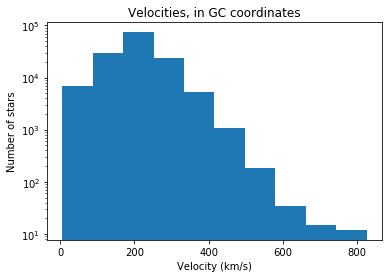

In [4]:
#calculate the magnitude of the velocity vector in GC coordinates
velocityGC = []
for i in np.arange(len(GCxvel)):
    velocityGC.append(np.sqrt(GCxvel[i]**2 + GCyvel[i]**2 + GCzvel[i]**2))
    
plt.hist(velocityGC)
plt.xlabel("Velocity (km/s)")
plt.ylabel("Number of stars")
plt.yscale('log')
plt.title("Velocities, in GC coordinates")
plt.show()

#sigmaGC = np.std(velocityGC)
#print("The velocity dispersion is " + repr(sigmaGC) + " km/s.")

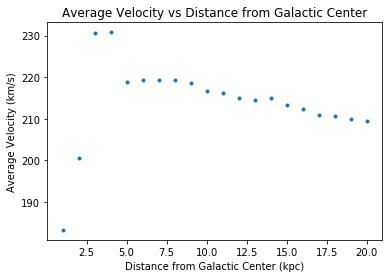

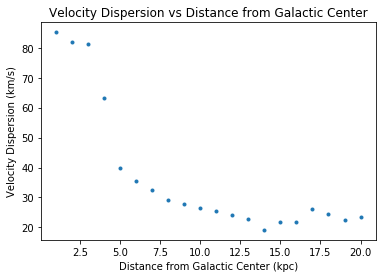

In [5]:
#calculate average velocity and velocity dispersion as a function of distance from the Galactic Center
radiusGC = []
for i in np.arange(len(GCx)):
    radiusGC.append(np.sqrt(GCx[i]**2 + GCy[i]**2 + GCz[i]**2))

radiusGC = np.array(radiusGC)
velocityGC = np.array(velocityGC)

averagevel = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
veldispersion = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for i in np.arange(20):
    velocities = velocityGC[(radiusGC > i) & (radiusGC <= i + 1)]
    averagevel[i] = np.mean(velocities)
    veldispersion[i] = np.std(velocities)
    
radialdist = np.arange(1,21)
plt.plot(radialdist, averagevel, '.')
plt.xlabel("Distance from Galactic Center (kpc)")
plt.ylabel("Average Velocity (km/s)")
plt.title("Average Velocity vs Distance from Galactic Center")
plt.show()

radialdist = np.arange(1,21)
plt.plot(radialdist, veldispersion, '.')
plt.xlabel("Distance from Galactic Center (kpc)")
plt.ylabel("Velocity Dispersion (km/s)")
plt.title("Velocity Dispersion vs Distance from Galactic Center")
plt.show()

A reference for the code above: https://stackoverflow.com/questions/16343752/numpy-where-function-multiple-conditions